# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should look like this with a cluster column at the last.                                                                                      


                                           

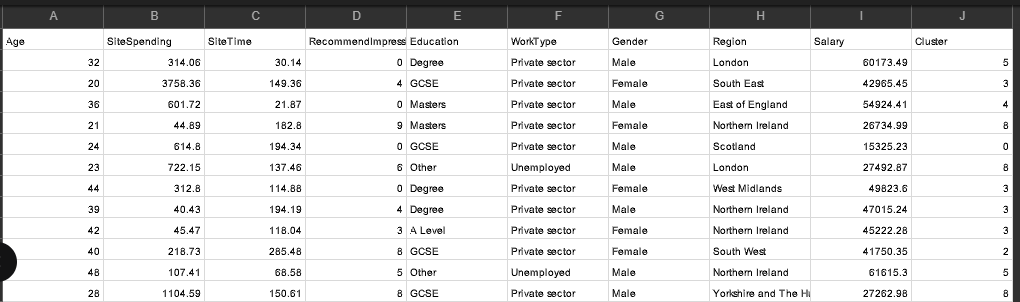

## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1 and extract predicted clusters out of it.

In [16]:
import numpy as np
import pandas as pd

In [17]:
import numpy as np
import pandas as pd

# Load dataset
def load_dataset():
    df = pd.read_excel('dataset.xlsx')
    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):
    # Convert categorical features to numeric using one-hot encoding
    categorical_features = ['Education', 'WorkType', 'Gender', 'Region']
    df = pd.get_dummies(df, columns=categorical_features)  # Updated with your features

    # Apply scaling using StandardScaler
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df = pd.DataFrame(df_scaled, columns=df.columns)

    # Normalize numerical columns
    df = (df - df.mean()) / df.std()

    # Drop irrelevant columns if needed (replace 'irrelevant_column' with actual column name if any)
    # if 'irrelevant_column' in df.columns:
    #     df = df.drop(columns=['irrelevant_column'])
    # else:
    #     print("Warning: 'irrelevant_column' column not found in the dataset.")

    processed_df = df.copy()
    return processed_df

In [20]:
df = load_dataset()
print(df.head())
df_processed = preprocess_data(df)
print(df_processed.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  
0    Male            London  60173.49  
1  Female        South East  42965.45  
2    Male   East of England  54924.41  
3  Female  Northern Ireland  26734.99  
4    Male          Scotland  15325.23  
        Age  SiteSpending  SiteTime  RecommendImpression    Salary  \
0 -0.652367     -0.606033 -1.408885            -1.301758  0.590816   
1 -1.565088      2.782434 -0.020064            -0.212193 -0.170762   
2 -0.348127     -0.323036 -1.505224            -1.301758  0.358

In [25]:
import numpy as np

def kmeans_from_scratch(X, k, max_iters=100):

  """
  Performs K-Means clustering from scratch.

  Args:
    X: 2D numpy array of data points.
    k: Number of clusters.
    max_iters: Maximum number of iterations.

  Returns:
    labels: 1D numpy array of cluster assignments.
    centroids: final centroid coordinates.
  """
  # Convert X to a NumPy array if it's a DataFrame
  if isinstance(X, pd.DataFrame):
      X = X.values

  # 1. Initialize centroids randomly
  centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
  labels = np.zeros(X.shape[0])

  for _ in range(max_iters):
    # 2. Assign each data point to the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # 3. Update centroids to the mean of assigned data points
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # 4. Check for convergence
    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids

  return labels, centroids

In [26]:
k = 3
max_iter = 200
df = load_dataset()
df_processed = preprocess_data(df)
labels, centroids = kmeans_from_scratch(df_processed, k)
df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        2  
1  Female        South East  42965.45        1  
2    Male   East of England  54924.41        0  
3  Female  Northern Ireland  26734.99        0  
4    Male          Scotland  15325.23        2  


## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
df = load_dataset()
df_processed = preprocess_data(df)

# 1. Apply KMeans from sklearn
k = 3  # Number of clusters
max_iter = 200  # Maximum iterations

kmeans = KMeans(n_clusters=k, max_iter=max_iter, random_state=0)  # Initialize KMeans
kmeans.fit(df_processed)  # Fit to the processed data


# 2. Get predicted labels
predicted_labels = kmeans.labels_

In [33]:

df['Cluster'] = labels
print(df.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  Cluster  
0    Male            London  60173.49        2  
1  Female        South East  42965.45        1  
2    Male   East of England  54924.41        0  
3  Female  Northern Ireland  26734.99        0  
4    Male          Scotland  15325.23        2  


## **Part 3:**
Visualize the clusters using PCA (2D)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [39]:
def visualize_clusters(X, labels, title):
# TODO:
  # 1. Apply PCA to reduce features to 2 dimensions
  pca = PCA(n_components=2)  # Initialize PCA with 2 components
  X_reduced = pca.fit_transform(X)  # Apply PCA to reduce dimensions

  # 2. Create a scatter plot (use Cluster as color)
  plt.figure(figsize=(8, 6))
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.7)

  # 3. Add axis labels and title
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.title(title)
  plt.colorbar(label='Cluster')
  plt.show()

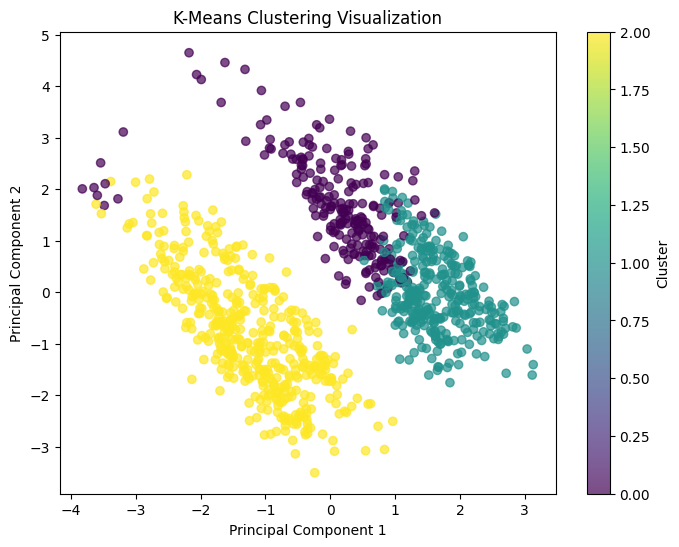

In [42]:
# Call this after scaling and predicting in Part 2
from sklearn.preprocessing import StandardScaler

df = load_dataset()
df_processed = preprocess_data(df)

# Assuming df_processed is the data you want to scale:
scaler = StandardScaler()  # Create a scaler object
scaled_data = scaler.fit_transform(df_processed)  # Fit and transform your data

# 1. Apply KMeans from sklearn
k = 3  # Number of clusters
max_iter = 200  # Maximum iterations

kmeans = KMeans(n_clusters=k, max_iter=max_iter, random_state=0)  # Initialize KMeans
kmeans.fit(scaled_data)  # Fit to the scaled data


# 2. Get predicted labels
predicted_labels = kmeans.labels_

visualize_clusters(scaled_data, predicted_labels, "K-Means Clustering Visualization")